# Series 8 : Monte Carlo Methods


## 1) Sampling $\pi$ with MCMC

In [1]:
import numpy as np
import random as r
import matplotlib.pyplot as plt
%matplotlib inline

### Q1: Implémentez l'algorithme MCMC et tracez la position des points après $1000$, $4000$ et $20000$ étapes. Commentez les résultats obtenus.

In [2]:
def step_MCMC(x, y, stepsize):
    xx = x - 2.0 * stepsize * r.random() + stepsize
    yy = y - 2.0 * stepsize * r.random() + stepsize

    if abs(xx) < 1 and abs(yy) < 1:
        x = xx
        y = yy

    return x, y


def S(x, y):
    if x * x + y * y < 1:
        return 4.0
    else:
        return 0


def plot(N, stepsize):
    X = [0.0 for _ in range(0, N)]
    Y = [0.0 for _ in range(0, N)]
    XX = [0.0]
    YY = [0.0]
    for i in range(0, N - 1):
        X[i + 1], Y[i + 1] = step_MCMC(X[i], Y[i], stepsize)
        if S(X[i + 1], Y[i + 1]) > 0:
            XX = XX + [X[i + 1]]
            YY = YY + [Y[i + 1]]
    plt.figure(figsize=(6,6))
    plt.plot(X, Y, "b.", XX, YY, "r.")
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    return 4.0 * len(XX) / (N * 1.0)


def pi_est(N, stepsize):
    Stot = 0
    x, y = 0.0, 0.0
    for _ in range(0, N):
        x, y = step_MCMC(x, y, stepsize)
        Stot = Stot + S(x, y)

    pi = Stot / N

    return pi

3.012

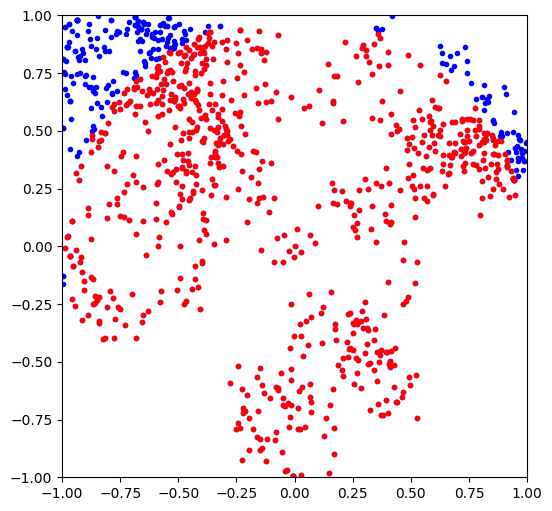

In [242]:
plot(N=1000,stepsize=0.1)

Almost all points are inside the circle. So, we are overestimating the value of $\pi$. We don't have enough points to explore all the space.

3.084

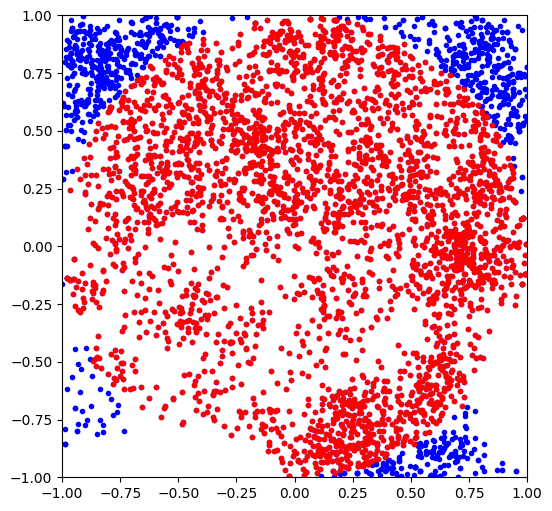

In [243]:
plot(N=4000,stepsize=0.1)

This simulation is better but not enough. We still have non-negligible white spaces in the square.

3.2238

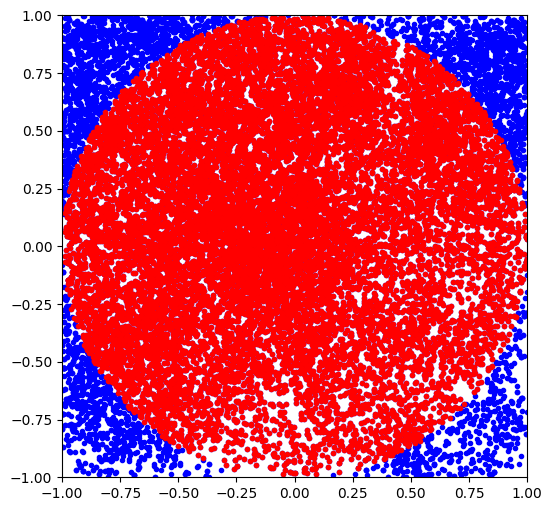

In [244]:
plot(N=20000,stepsize=0.1)

Here we can see an almost complete distribution over the entire surface, so we have enought points in order to 
get a good estimate of $\pi$.

### Q2: Le choix de $stepsize=0.1$ est-il optimal ? Une règle empirique suggère que la probabilité d'acceptation d'un mouvement devrait être d'environ $1/2$ sur une longue période. Déterminez la valeur optimale de $stepsize$ par apport a cette règle et répétez les tracés de la question précédente. Comparez les résultats avec ceux obtenus précédemment.

Here we plot the acceptance in function of the stepsize. We see that the bigger the stepsize the less probable is to accept a new move, so the acceptance rate decreases.

In [245]:
def step_and_acc(x, y, stepsize, acc_moves):
    xx = x - 2.0 * stepsize * r.random() + stepsize
    yy = y - 2.0 * stepsize * r.random() + stepsize

    if abs(xx) < 1 and abs(yy) < 1:
        x = xx
        y = yy
        acc_moves += 1

    return x, y, acc_moves


# This function returns the value of pi and the acceptance rate.
def pi_and_acc(N, stepsize):
    Stot = 0
    x, y = 0.0, 0.0
    acc_moves = 0
    for _ in range(0, N):
        x, y, acc_moves = step_and_acc(x, y, stepsize, acc_moves)
        Stot = Stot + S(x, y)

    pi = Stot / N
    acc_moves /= N

    return pi, acc_moves

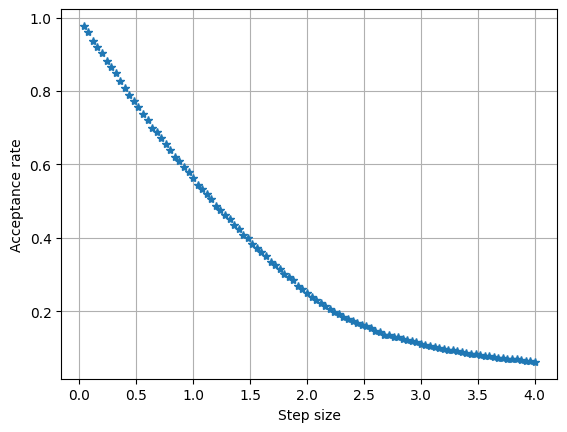

In [246]:
N = 100_000

step_list = np.linspace(0.04,4,100)

pi_list = np.zeros(100)
a_list = np.zeros(100)

for i in range(0,100) :
    pi_list[i], a_list[i] = pi_and_acc(N,step_list[i])
    
plt.plot(step_list,a_list,"*")
plt.xlabel("Step size")
plt.ylabel("Acceptance rate")
plt.grid()

We're going to compute the optimal stepsize which gives us the acceptance equal to $\frac{1}{2}$

In [247]:
aa = [abs(a_list[i] - 0.5) for i in range(0, 100)]
# optimal d:
step_opt = step_list[np.argmin(aa)]
print(step_opt)

1.1600000000000001


Here we perform again the simulations with the optimal value of the stepsize and see what happens increasing the number of datapoints. Even for few datapoints we can see that we explore more uniformly the space.

3.112

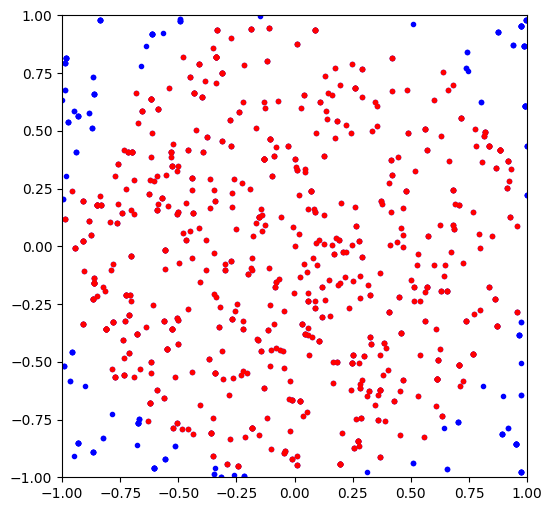

In [248]:
plot(1000,step_opt)

3.241

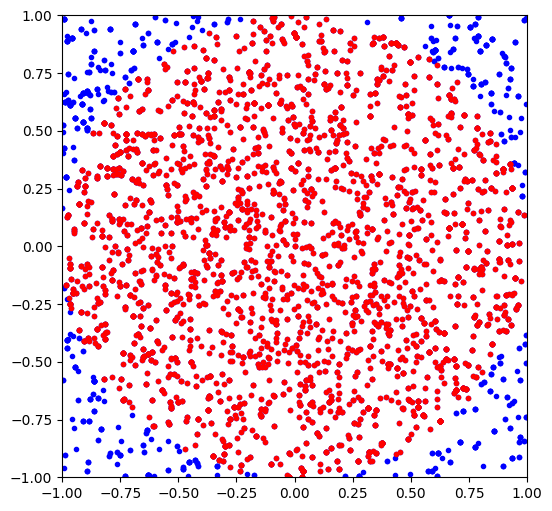

In [249]:
plot(4000,step_opt)

3.145

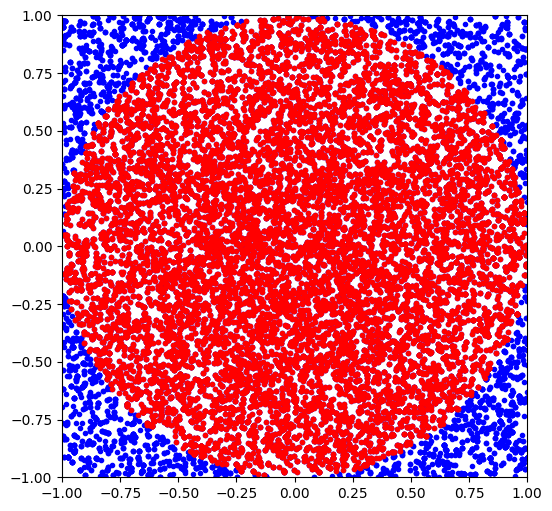

In [250]:
plot(20000,step_opt)

### Q3: Étudions la convergence de l'estimateur $\hat{m}$. Tracez l'erreur d'estimation en fonction de $N$ pour $N \in [10^2,10^4]$ et vérifiez si celle-ci est proportionnelle à $1/\sqrt{N}$.

Here we plot the error in computing $\pi$ as a function of datapoints and we see that it goes like $\frac{1}{\sqrt{N}}$

In [252]:
# This function returns the data of a simulation
def Simulate(N, stepsize):

    Stot = np.zeros(N)

    x, y = 0.0, 0.0

    for i in range(0, N):
        x, y = step_MCMC(x, y, stepsize)
        Stot[i] = S(x, y)

    return Stot

/Users/matteovilucchio/Documents/GitHub/IdePHICS/PHYS338private/venv/lib/python3.12/site-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/matteovilucchio/Documents/GitHub/IdePHICS/PHYS338private/venv/lib/python3.12/site-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/matteovilucchio/Documents/GitHub/IdePHICS/PHYS338private/venv/lib/python3.12/site-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/vl/6t_sjl4j16nd3xx4b0t7wd280000gn/T/ipykernel_18615/2974582964.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  plt.plot(n, [1.0 / np.sqrt(i * 1.0) for i in n])


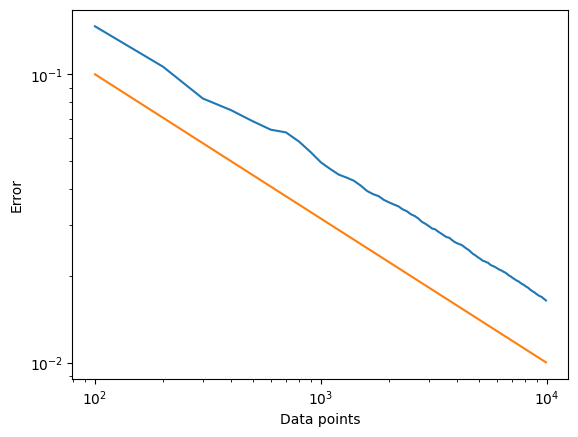

In [253]:
N = 10000
S_list = Simulate(N, step_opt)

n = [i for i in range(0, N, 100)]

std = [np.std(S_list[0 : n[i]]) / np.sqrt(n[i] * 1.0) for i in range(len(n))]

plt.plot(n, std)
plt.xlabel("Data points")
plt.ylabel("Error")
plt.xscale("log")
plt.yscale("log")
# trace 1/sqrt(n)

plt.plot(n, [1.0 / np.sqrt(i * 1.0) for i in n])

### Q4) Implémentez cette stratégie de regroupement et analysez l'évolution de l'erreur estimée pour les deux valeurs de $stepsize$ (optimale et $0.1$). Vérifiez que le plateau obtenu correspond bien à l'erreur réelle de la chaîne de Markov.

The error computed using the naive estimator is wrong because that estimator is designed for data without correlations. In order to get rid of the correlation we perform a bunching procedure. As expected, the error initially grows and then reaches a plateau which is the exact error. Moreover, we can see that, if we use the optimal stepsize, the error rapidly saturates around the real value, since less steps are required to compute the value of $\pi$.

In [254]:
def bunching(x):
    s=[(x[i]+x[i+1])*0.5 for i in range(0,len(x),2)]
    return s

Text(0.5, 1.0, 'Behavior of the error with a generic stepsize')

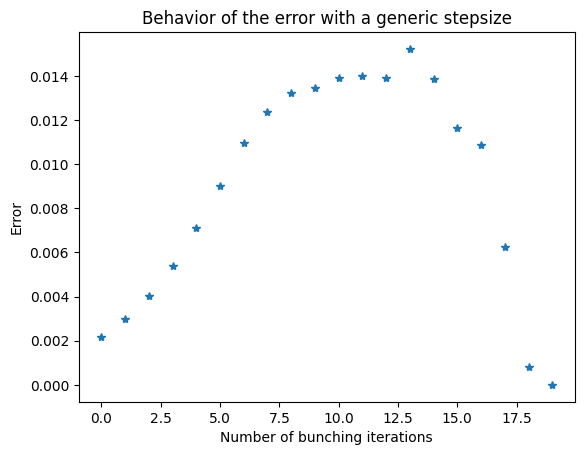

In [255]:
S_list= Simulate(2**20,0.1)
     
std=np.zeros(20)

for i in range(0,20):
    
    S_list=bunching(S_list)
    std[i]= np.std(S_list)/ np.sqrt(len(S_list)*1.)     
    
plt.plot(std,"*")
plt.xlabel("Number of bunching iterations")
plt.ylabel("Error")
plt.title("Behavior of the error with a generic stepsize")

Text(0.5, 1.0, 'Behavior of the error with a generic stepsize')

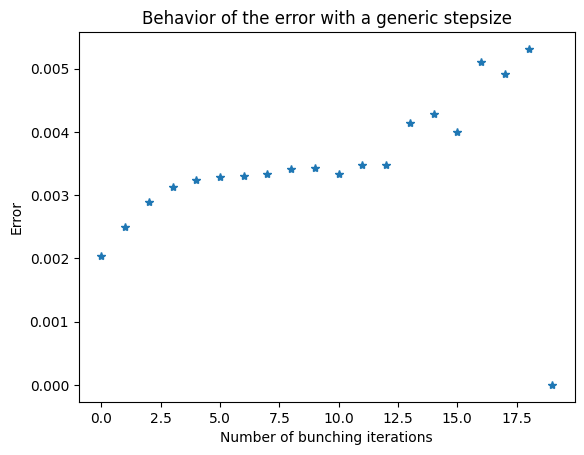

In [256]:
S_list= Simulate(2**20,step_opt)
     
std=np.zeros(20)

for i in range(0,20):
    
    S_list=bunching(S_list)
    std[i]= np.std(S_list)/ np.sqrt(len(S_list)*1.)     
    
plt.plot(std,"*")
plt.xlabel("Number of bunching iterations")
plt.ylabel("Error")
plt.title("Behavior of the error with a generic stepsize")

### Q5: Why does bunching work?

We reach a plateau in the error because after a certain value of the iterations of the bunching procedure our datapoints are no more correlated. It is a coarse graining procedure: the result is a reduction in coherence length and at a certain point this quantity will tend to zero.
Essentially when the bunchsize is bigger than the correlation length of our original data, then the coarse grained data are not anymore correlated.

### Q6 : Metropolis Hasting

In [269]:
def metropolis_move(x, y, stepsize):
    xx = x - 2.0 * stepsize * r.random() + stepsize
    yy = y - 2.0 * stepsize * r.random() + stepsize

    if abs(xx) < 1 and abs(yy) < 1:
        if xx < 0 and x >= 0:
            if r.random() < 0.5:
                x = xx
                y = yy
        else:
            x = xx
            y = yy
    return x, y

In [280]:
def plot_hasting(N, stepsize):
    X = [0.0 for _ in range(0, N)]
    Y = [0.0 for _ in range(0, N)]
    XX = [0.0]
    YY = [0.0]
    for i in range(0, N - 1):
        X[i + 1], Y[i + 1] = metropolis_move(X[i], Y[i], stepsize)
        if S(X[i + 1], Y[i + 1]) > 0:
            XX = XX + [X[i + 1]]
            YY = YY + [Y[i + 1]]
    plt.figure(figsize=(6,6))
    plt.plot(X, Y, "b.", XX, YY, "r.")
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    return 4.0 * len(XX) / N


def pi_est(N, stepsize):
    Stot = 0
    x, y = 0.0, 0.0
    for _ in range(0, N):
        x, y = step_MCMC(x, y, stepsize)
        Stot = Stot + S(x, y)

    pi = Stot / N

    return pi

1.928

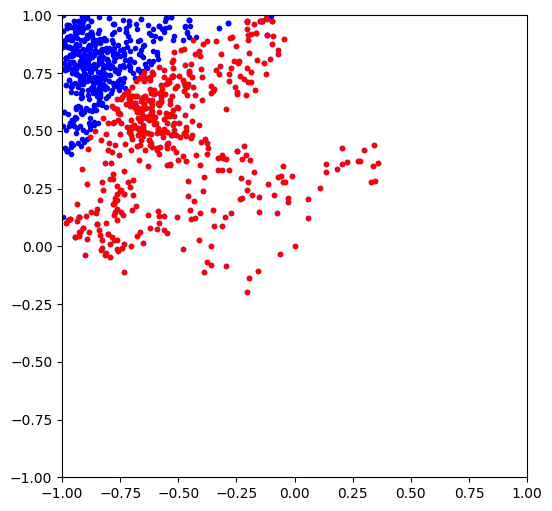

In [281]:
plot_hasting(N=1000,stepsize=0.1)

3.112

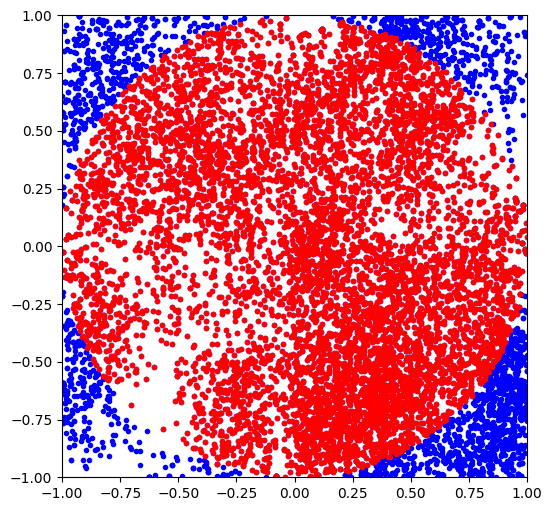

In [282]:
plot_hasting(N=10_000,stepsize=0.1)

3.13272

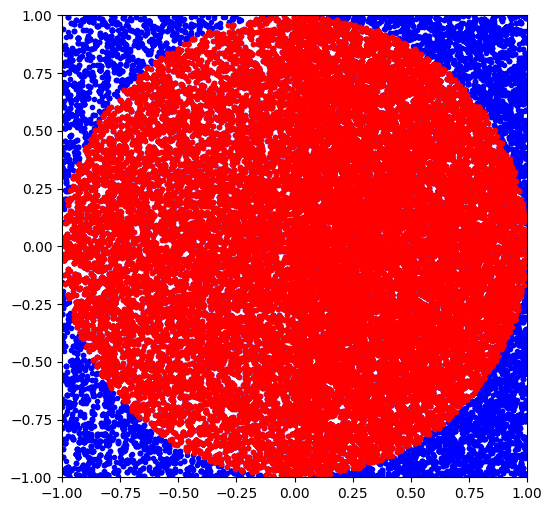

In [285]:
plot_hasting(N=50_000,stepsize=1)

## Exercice 2 : Importance Sampling

### Q1 

In [3]:
def fun(x):
    return 1.0 - np.exp(-x)

In [4]:
true_integral = np.exp(-1)
true_p = true_integral / (1.0 - np.exp(-1))
true_variance_p = true_p * (1.0 - true_p)

In [5]:
def direct_sampling_rect(min_x, max_x, min_y, max_y, N, f):
    xs = np.random.uniform(min_x, max_x, N)
    ys = np.random.uniform(min_y, max_y, N)

    total_area = (max_x - min_x) * (max_y - min_y)

    below = 0
    for i in range(0, N):
        if ys[i] < f(xs[i]):
            below += 1
    
    return below / N * total_area, xs, ys

In [6]:
min_x = 0
max_x = 1
min_y = 0
max_y = 1 - np.exp(-1)
area = (max_x - min_x) * (max_y - min_y)

N = 1000

int_estim, xs, ys = direct_sampling_rect(min_x, max_x, min_y, max_y, N, fun)

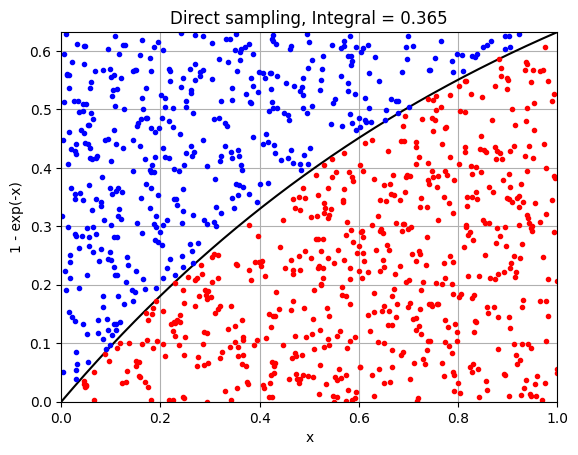

In [7]:
xx = np.linspace(min_x, max_x, 1000)
yy = fun(xx)

plt.plot(xx, yy, "k-")

plt.plot(xs[ys < fun(xs)], ys[ys < fun(xs)], "r.")
plt.plot(xs[ys >= fun(xs)], ys[ys >= fun(xs)], "b.")

plt.xlabel("x")
plt.ylabel("1 - exp(-x)")
plt.ylim(0, 1-np.exp(-1))
plt.xlim(0, 1)
plt.title(f"Direct sampling, Integral = {int_estim:.3f}")

plt.grid()

In [8]:
# evolutiaon of error with N
Ns = np.logspace(1, 6.5, 30, dtype=int)
I_hat = np.empty(len(Ns))
variance = np.empty(len(Ns))

for i in range(len(Ns)):
    I_hat[i], _, _ = direct_sampling_rect(min_x, max_x, min_y, max_y, Ns[i], fun)
    p_hat = I_hat[i] / area
    variance[i] = p_hat * (1 - p_hat) * area**2

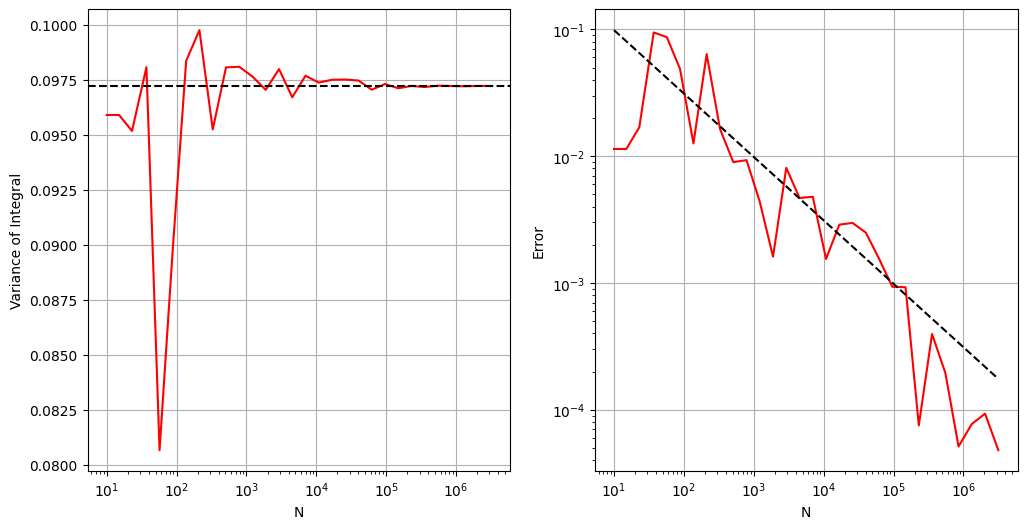

In [9]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(Ns, variance, "r-")
plt.axhline(y=true_variance_p * area**2, color="k", linestyle="--")
plt.xscale("log")
plt.xlabel("N")
plt.ylabel("Variance of Integral")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(Ns, np.abs(I_hat - true_integral), "r-")
plt.plot(Ns, np.sqrt(true_variance_p * area**2) / np.sqrt(Ns), "k--")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Error")
plt.grid()

### Q2



In [10]:
true_p = true_integral * 2
true_variance_p = true_p * (1.0 - true_p)
total_area = 0.5

In [11]:
def sample_linear_points_inverse(N):
    return np.sqrt(np.random.uniform(0, 1, N))

In [12]:
def sample_under_the_line(N, c=1):
    xs = sample_linear_points_inverse(N)
    ys = np.empty_like(xs)

    total_area = 0.5

    below = 0
    for i in range(0, N):
        ys[i] = np.random.uniform(0, c * xs[i])
        if ys[i] < 1 - np.exp(-xs[i]):
            below += 1
    return below / N  * total_area, xs, ys

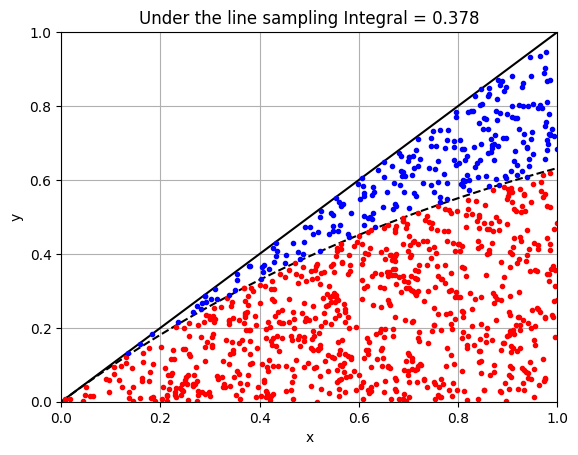

In [13]:
xx = np.linspace(0, 1, 100)
yy = xx
fun_xx = fun(xx)

N = 1000
int_est, x_samples, y_samples = sample_under_the_line(N)

plt.plot(xx, yy, "k-")
plt.plot(xx, fun_xx, "k--")

plt.plot(x_samples[y_samples < fun(x_samples)], y_samples[y_samples < fun(x_samples)], "r.")
plt.plot(x_samples[y_samples >= fun(x_samples)], y_samples[y_samples >= fun(x_samples)], "b.")

plt.xlabel("x")
plt.ylabel("y")
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.title(f"Under the line sampling Integral = {int_est:.3f}")
plt.grid()

In [ ]:
# evolutiaon of error with N
Ns = np.logspace(1, 6, 30, dtype=int)
I_hat = np.empty(len(Ns))
variance = np.empty(len(Ns))

for i in range(len(Ns)):
    I_hat[i], _, _ = sample_under_the_line(Ns[i])
    p_hat = I_hat[i] / total_area
    variance[i] = p_hat * (1 - p_hat) * total_area**2

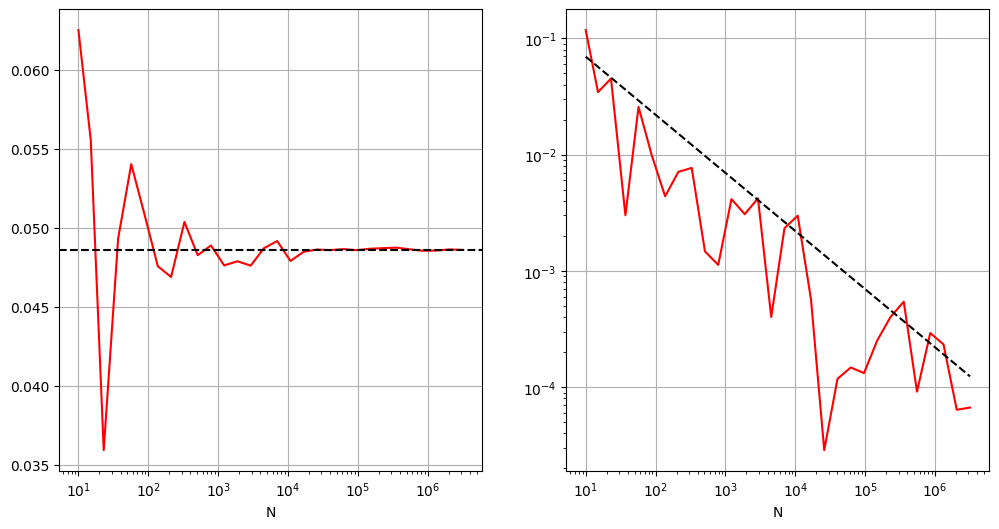

In [199]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(Ns, variance, "r-")
plt.axhline(y=true_variance_p * total_area**2, color="k", linestyle="--")
plt.xscale("log")
plt.xlabel("N")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(Ns, np.abs(I_hat - true_integral), "r-")
plt.plot(Ns, np.sqrt(true_variance_p * total_area**2) / np.sqrt(Ns), "k--")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("N")
plt.grid()

### Q3

In [200]:
total_area = (1 - np.exp(-1)) * 2 / 3
true_p = true_integral / total_area
true_variance_p = true_p * (1.0 - true_p)

In [203]:
def upper_bnd(x):
    return (1 - np.exp(-1)) * np.sqrt(x)

In [204]:
def generate_sqrt(N):
    return np.random.uniform(0, 1, N)**(2/3)

In [205]:
def sample_under_sqrt(N):
    xs = generate_sqrt(N)
    ys = np.empty_like(xs)

    total_area = (1 - np.exp(-1)) * 2 / 3

    below = 0
    for i in range(0, N):
        ys[i] = np.random.uniform(0, np.sqrt(xs[i])) * (1 - np.exp(-1)) 
        if ys[i] < fun(xs[i]):
            below += 1
            
    return below / N * total_area, xs, ys

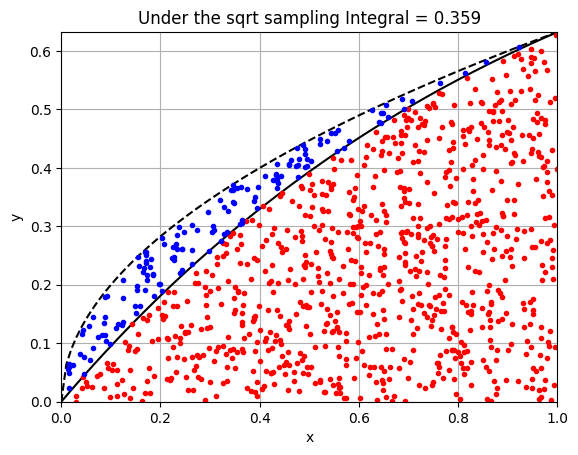

In [ ]:
xx = np.linspace(0, 1, 100)
fun_xx = fun(xx)
upper_bnd_xx = upper_bnd(xx)

plt.plot(xx, fun_xx, "k-")
plt.plot(xx, upper_bnd_xx, "k--")

N = 1000
integral_estim, x_samples, y_samples = sample_under_sqrt(N)

plt.plot(x_samples[y_samples < fun(x_samples)], y_samples[y_samples < fun(x_samples)], "r.")
plt.plot(x_samples[y_samples >= fun(x_samples)], y_samples[y_samples >= fun(x_samples)], "b.")

plt.xlabel("x")
plt.ylabel("y")
plt.ylim(0, 1-np.exp(-1))
plt.xlim(0, 1)
plt.title(f"Under the sqrt sampling Integral = {integral_estim:.3f}")
plt.grid()

In [208]:
# evolutiaon of error with N
Ns = np.logspace(1, 6, 30, dtype=int)
I_hat = np.empty(len(Ns))
variance = np.empty(len(Ns))

for i in range(len(Ns)):
    I_hat[i], _, _ = sample_under_sqrt(Ns[i])
    p_hat = I_hat[i] / total_area
    variance[i] = p_hat * (1 - p_hat) * total_area**2

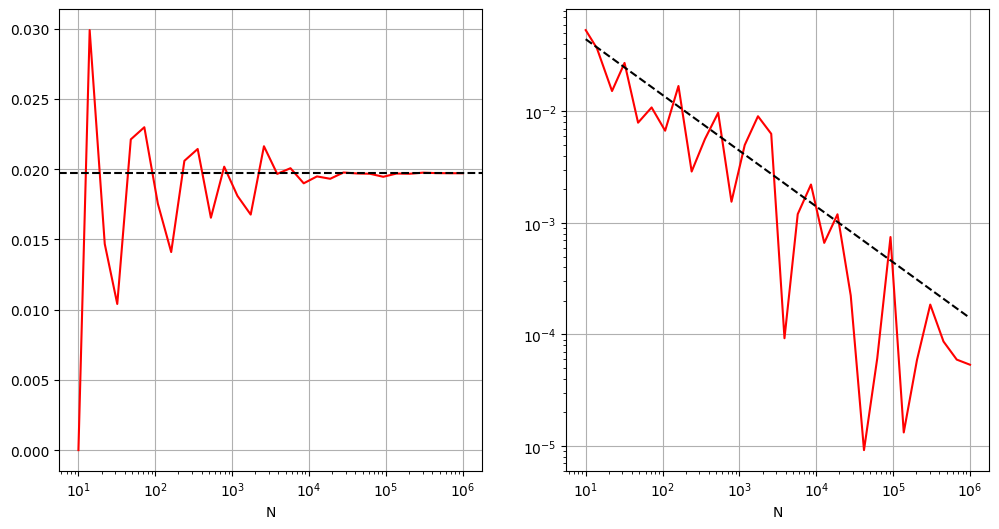

In [209]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(Ns, variance, "r-")
plt.axhline(y=true_variance_p * total_area**2, color="k", linestyle="--")
plt.xscale("log")
plt.xlabel("N")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(Ns, np.abs(I_hat - true_integral), "r-")
plt.plot(Ns, np.sqrt(true_variance_p * total_area**2) / np.sqrt(Ns), "k--")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("N")
plt.grid()

### Q4

In [65]:
def integral_estimation(N):
    x1, x2, x3 = np.random.normal(0, 1, (3, N))
    sum = 0
    for i in range(0, N):
        sum += np.abs(np.cos(np.sqrt(x1[i]**2 + x2[i]**4))) * np.tanh(x1[i]**2 + x2[i]**2 + x3[i]**4)

    return sum / N

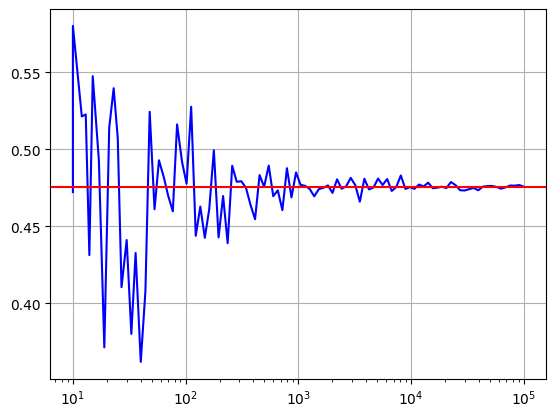

In [85]:
n = np.logspace(1, 5, 100, dtype=int)
estimates = [integral_estimation(N) for N in n]

plt.plot(n, estimates, "b-")
plt.axhline(y=0.47546, color='r', linestyle='-')
plt.xscale("log")
plt.grid()